In [65]:
!pip install tpot

In [285]:
## imporing the librarires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import rcParams
import seaborn as sns 
from tpot import TPOTRegressor

In [286]:
## importing the dataset
dataset = pd.read_csv("G://ADS//Assignment 2//Modified_energydata_complete(2).csv")
dataset.head()

,Unnamed: 0,date,Time,Energy_consumed,Appliances,lights,Kitchen_Temp,Kitchen_Hum,LivingRoom_Temp,LivingRoom_Hum,...,ParentRoom_Hum,Outside_Temp,Pressure,Humidity,Windspeed,Visibility,Tdewpoint,rv1,Month_Number,Weekday_number
0,0,2016-01-11,17:00:00,90,60,30,19.89,47.596667,19.2,44.790000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,1,0
1,1,2016-01-11,17:10:00,90,60,30,19.89,46.693333,19.2,44.722500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,1,0
2,2,2016-01-11,17:20:00,80,50,30,19.89,46.300000,19.2,44.626667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,1,0
3,3,2016-01-11,17:30:00,90,50,40,19.89,46.066667,19.2,44.590000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,1,0
4,4,2016-01-11,17:40:00,100,60,40,19.89,46.333333,19.2,44.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,1,0


In [287]:
## X are the varibles used for predictions
## Y is the target
X = dataset.iloc[:,6:33].values
Y = dataset.iloc[:,3].values

In [288]:
## fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [289]:
Y_predictions = regressor.predict(X_test)
#print(regressor.intercept_)
#print(regressor.coef_)
Y_predictions

array([  53.79530162,  107.21766618,   85.76481756, ...,   77.46966837,
        109.26695819,  107.25250077])

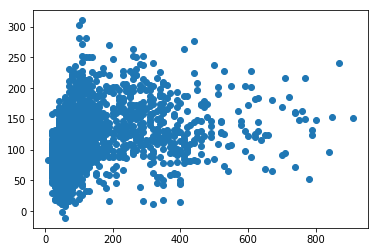

In [290]:
plt.scatter(Y_test,Y_predictions)
plt.show()

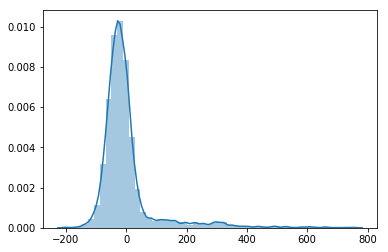

In [291]:
#Residual Distribution Plot
sns.distplot((Y_test-Y_predictions))
plt.show()

In [292]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((19735,1)).astype(int),values = X,axis = 1)
X_opt = X[:,0:32]
regressor_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     135.6
Date:                Fri, 16 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:55:49   Log-Likelihood:            -1.1805e+05
No. Observations:               19735   AIC:                         2.362e+05
Df Residuals:                   19707   BIC:                         2.364e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.3487     96.786      0.241      0.809    -166.360     213.058
x1            -0.6513      1.896     -0.344      0.731      -4.367       3.064
x2            16.5571      0.684     24.204      0.000      15.216      17.898
x3           -21.7007      1.667    -13.020      0.000     -24.968     -18.434
x4           -14.7222      0.784    -18.778      0.000     -16.259     -13.185
x5            26.4460      1.086     24.343      0.000      24.317      28.575
x6             4.5670      0.696      6.563      0.000       3.203       5.931
x7             6.8785      1.020      6.742      0.000       4.879       8.878
x8             2.4620      0.652      3.775      0.000       1.184       3.740
x9             0.8243      1.205      0.684      0.494      -1.538       3.187
x10            0.2600      0.089      2.927      0.003       0.086       0.434
x11            7.3409      0.654     11.233      0.000       6.060       8.622
x12            0.1460      0.077      1.906      0.057      -0.004       0.296
x13           -0.3661      1.367     -0.268      0.789      -3.045       2.313
x14           -2.0700      0.439     -4.711      0.000      -2.931      -1.209
x15           11.0746      0.990     11.182      0.000       9.133      13.016
x16           -6.4024      0.378    -16.959      0.000      -7.142      -5.662
x17          -21.1951      1.872    -11.319      0.000     -24.865     -17.525
x18           -2.0727      0.419     -4.943      0.000      -2.895      -1.251
x19           -8.3297      1.603     -5.197      0.000     -11.471      -5.188
x20            0.0785      0.110      0.717      0.474      -0.136       0.293
x21           -0.2619      0.333     -0.788      0.431      -0.914       0.390
x22            1.9925      0.357      5.588      0.000       1.294       2.691
x23            0.1848      0.059      3.119      0.002       0.069       0.301
x24            3.9531      1.520      2.601      0.009       0.974       6.932
x25           -0.0436      0.047     -0.925      0.355      -0.136       0.049
x26          -12.5759      1.781     -7.060      0.000     -16.067      -9.084
x27            1.0901      0.361      3.017      0.003       0.382       1.798
==============================================================================
Omnibus:                    13799.743   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202481.634
Skew:                           3.278   Prob(JB):                         0.00
Kurtosis:                      17.257   Cond. No.                     1.10e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might in

In [293]:
regressor.score(X_test,Y_test)

0.15051068206631391

In [230]:
regressor.score(X_train,Y_train)

0.16033855615153714

### R-square,RMSE,MAE,MAPE (TRAINING DATA)¶

In [231]:
# Predicting the test set results
train_pred =regressor.predict(X_train)

##  MAPE
import numpy as np
def mean_absolute_percentage_error(Y_train,train_pred): 
    Y_train, train_pred = np.array(Y_train), np.array(train_pred)
    return np.mean(np.abs((Y_train,train_pred) / Y_train)) * 100

In [232]:
## R-squared score of this model
from sklearn.metrics import*
import math
## Mean absolute error
MAE = mean_absolute_error(Y_train,train_pred)
print('MAE of Training Data =', MAE)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',RMSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_train,train_pred)
print('MAPE of Training Data =',MAPE)

MAE of Training Data = 54.8791980833
RMSE of Training Data = 95.81636471985377
R2 of Training Data = 0.160338556152
MAPE of Training Data = 121.126774449


### R-square,RMSE,MAE,MAPE (TESTING DATA)¶¶

In [233]:
## Predicting the test set results
test_pred =regressor.predict(X_test)

## MAPE
import numpy as np
def mean_absolute_percentage_error(Y_test,test_pred): 
    Y_test, test_pred = np.array(Y_test), np.array(test_pred)
    return np.mean(np.abs((Y_test,test_pred) / Y_test)) * 100

In [234]:
import math
##Mean absolute error
MAE = mean_absolute_error(Y_test,test_pred)
print('MAE of Testing Data=',MAE)
## Mean squared error
MSE = mean_squared_error(Y_test,test_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Testing Data=',RMSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_test,test_pred)
print('MAPE of Testing Data=',MAPE)

MAE of Testing Data= 55.1613328747
RMSE of Testing Data= 96.0730899330311
R2 of Testing Data= 0.140401776372
MAPE of Testing Data= 122.353307696


## FEATURE SELECTION AFTER BORUTA

In [235]:
#tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
#tpot.fit(X_train, Y_train)
#print(tpot.score(X_test, Y_test))
#tpot.export('tpot_iris_pipeline.py')

In [236]:
## X are the varibles used for predictions
## Y is the target
X = dataset.iloc[:,[7,8,9,11,13,15,16,17,19,20,21,23,24,25,26,29]].values
Y = dataset.iloc[:,3].values

In [237]:
## fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [238]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((19735,1)).astype(int),values = X,axis = 1)
X_opt = X[:,0:32]
regressor_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     159.9
Date:                Fri, 16 Mar 2018   Prob (F-statistic):               0.00
Time:                        15:33:46   Log-Likelihood:            -1.1853e+05
No. Observations:               19735   AIC:                         2.371e+05
Df Residuals:                   19718   BIC:                         2.372e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.5734     90.297      1.955      0.051      -0.417     353.564
x1            14.4408      0.607     23.779      0.000      13.251      15.631
x2           -11.8819      0.988    -12.024      0.000     -13.819      -9.945
x3           -11.9967      0.627    -19.142      0.000     -13.225     -10.768
x4             7.2320      0.692     10.452      0.000       5.876       8.588
x5             2.4861      0.573      4.340      0.000       1.363       3.609
x6             0.2314      0.087      2.654      0.008       0.061       0.402
x7             5.4992      0.619      8.878      0.000       4.285       6.713
x8             0.3044      0.065      4.681      0.000       0.177       0.432
x9            -2.7674      0.403     -6.862      0.000      -3.558      -1.977
x10            9.1791      0.756     12.136      0.000       7.697      10.662
x11           -5.2951      0.356    -14.874      0.000      -5.993      -4.597
x12           -2.1600      0.399     -5.414      0.000      -2.942      -1.378
x13           -9.4982      1.527     -6.220      0.000     -12.491      -6.505
x14           -0.0339      0.105     -0.324      0.746      -0.239       0.171
x15           -1.2144      0.311     -3.900      0.000      -1.825      -0.604
x16            6.1321      1.489      4.119      0.000       3.214       9.050
==============================================================================
Omnibus:                    13730.883   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           192661.331
Skew:                           3.274   Prob(JB):                         0.00
Kurtosis:                      16.835   Cond. No.                     9.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R-square,RMSE,MAE,MAPE (TRAINING DATA) After Selecting Features(From Boruta)

In [ ]:
# Predicting the test set results
train_pred =regressor.predict(X_train)

##  MAPE
import numpy as np
def mean_absolute_percentage_error(Y_train,train_pred): 
    Y_train, train_pred = np.array(Y_train), np.array(train_pred)
    return np.mean(np.abs((Y_train,train_pred) / Y_train)) * 100

In [262]:
## R-squared score of this model
from sklearn.metrics import*
import math
## Mean absolute error
MAE = mean_absolute_error(Y_train,train_pred)
print('MAE of Training Data =', MAE)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',RMSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_train,train_pred)
print('MAPE of Training Data =',MAPE)

MAE of Training Data = 70.2461417113
RMSE of Training Data = 112.96096481830213
R2 of Training Data = -0.163192594669
MAPE of Training Data = 129.204229216


### R-square,RMSE,MAE,MAPE (TESTING DATA) After Selecting Features (From boruta)

In [263]:
## Predicting the test set results
test_pred =regressor.predict(X_test)

## MAPE
import numpy as np
def mean_absolute_percentage_error(Y_test,test_pred): 
    Y_test, test_pred = np.array(Y_test), np.array(test_pred)
    return np.mean(np.abs((Y_test,test_pred) / Y_test)) * 100

In [264]:
import math
##Mean absolute error
MAE = mean_absolute_error(Y_test,test_pred)
print('MAE of Testing Data=',MAE)
## Mean squared error
MSE = mean_squared_error(Y_test,test_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Testing Data=',RMSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_test,test_pred)
print('MAPE of Testing Data=',MAPE)

MAE of Testing Data= 56.2796865285
RMSE of Testing Data= 96.2497906300326
R2 of Testing Data= 0.125543557022
MAPE of Testing Data= 122.967874807


### FORWARD SELECTION

In [268]:
X1= dataset[[
       'Kitchen_Temp', 'Kitchen_Hum', 'LivingRoom_Temp', 'LivingRoom_Hum',
       'LaundryRoom_Temp', 'LaundryRoom_Hum', 'OfficeRoom_Temp',
       'OfficeRoom_Hum', 'BathRoom_Temp', 'BathRoom_Hum', 'OutsideNorth_Temp',
       'OutsideNorth_Hum', 'IroningRoom_Temp', 'IroningRoom_Hum',
       'TeenagerRoom_Temp', 'TeenagerRoom_Hum', 'ParentRoom_Temp',
       'ParentRoom_Hum', 'Outside_Temp', 'Pressure', 'Humidity', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'Month_Number', 'Weekday_number']]

In [269]:
y1=dataset['Energy_consumed']

In [270]:
import statsmodels.api as sm
def stepwise_selection(X1, y1, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X1.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y1, sm.add_constant(X1)).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
            if not changed:
                break
            return included

result = stepwise_selection(X1, y1)

print('resulting features:')
print(result)    


Add  LaundryRoom_Temp               with p-value 5.4523e-129
resulting features:
['LaundryRoom_Temp']


By using Forward selection method we only get one variable as an important feature. So wwe will try backward Elimination

### BACKWARD ELIMINATION METHOD

In [271]:
import statsmodels.api as sm
def stepwise_selection(X1, y1, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
        included = list(initial_list)
        while True:
            changed=False
import statsmodels.api as sm
def stepwise_selection(X1, y1, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
         # backward step
        model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X1, y1)

print('resulting features:')
print(result)
    

resulting features:
[]


By using Backward Elimination method we do not get any variable as an important feature.We will now try Exhaustive Search Method which is a combination of both forward selection and backward Elmination method

### EXHAUSTIVE SEARCH METHOD

In [272]:
import statsmodels.api as sm
def stepwise_selection(X1, y1, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X1.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X1, y1)

print('resulting features:')
print(result)

Add  Humidity                       with p-value 2.22825e-92
Add  Kitchen_Hum                    with p-value 1.2589e-85
Add  TeenagerRoom_Hum               with p-value 4.48028e-143
Add  LivingRoom_Hum                 with p-value 1.8353e-101
Add  Month_Number                   with p-value 1.90285e-35
Drop Humidity                       with p-value 0.616498
Add  LaundryRoom_Temp               with p-value 6.44506e-75
Add  ParentRoom_Temp                with p-value 4.20613e-71
Add  LivingRoom_Temp                with p-value 7.6848e-31
Add  TeenagerRoom_Temp              with p-value 1.32161e-32
Add  OutsideNorth_Temp              with p-value 7.97415e-23
Add  Outside_Temp                   with p-value 5.87504e-15
Add  Windspeed                      with p-value 1.05919e-06
Add  OfficeRoom_Temp                with p-value 9.88067e-08
Add  Tdewpoint                      with p-value 7.5834e-08
Add  LaundryRoom_Hum                with p-value 1.27303e-08
Add  ParentRoom_Hum          

### FEATURE SELECTION AFTER EXHAUSTIVE SEARCH

In [278]:
## X are the varibles used for predictions
## Y is the target
X = dataset.iloc[:,[7,21,9,31,10,22,8,20,16,24,27,12,29,11,23,19,13,15,28,32]].values
Y = dataset.iloc[:,3].values
Y

array([ 90,  90,  80, ..., 280, 430, 440], dtype=int64)

In [279]:
## fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=np.random)
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [280]:
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((19735,1)).astype(int),values = X,axis = 1)
X_opt = X[:,0:32]
regressor_OLS = sm.OLS(endog = Y,exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     182.9
Date:                Fri, 16 Mar 2018   Prob (F-statistic):               0.00
Time:                        17:30:49   Log-Likelihood:            -1.1805e+05
No. Observations:               19735   AIC:                         2.361e+05
Df Residuals:                   19714   BIC:                         2.363e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.9145     21.247      3.243      0.001      27.268     110.561
x1            16.5993      0.593     27.987      0.000      15.437      17.762
x2            -6.3374      0.352    -17.985      0.000      -7.028      -5.647
x3           -14.7608      0.701    -21.043      0.000     -16.136     -13.386
x4           -13.7872      1.575     -8.752      0.000     -16.875     -10.699
x5            26.1841      0.971     26.962      0.000      24.281      28.088
x6           -21.1869      1.410    -15.023      0.000     -23.951     -18.423
x7           -21.7919      1.270    -17.160      0.000     -24.281     -19.303
x8            10.7774      0.840     12.825      0.000       9.130      12.425
x9             6.9340      0.578     12.000      0.000       5.801       8.067
x10           -7.3178      0.657    -11.145      0.000      -8.605      -6.031
x11            1.9457      0.333      5.845      0.000       1.293       2.598
x12            6.8767      0.973      7.067      0.000       4.969       8.784
x13            3.2450      0.533      6.086      0.000       2.200       4.290
x14            4.6295      0.690      6.708      0.000       3.277       5.982
x15           -2.0383      0.403     -5.064      0.000      -2.827      -1.249
x16           -2.1319      0.397     -5.371      0.000      -2.910      -1.354
x17            2.6009      0.636      4.088      0.000       1.354       3.848
x18            0.2729      0.086      3.184      0.001       0.105       0.441
x19            0.1886      0.059      3.197      0.001       0.073       0.304
x20            1.0697      0.360      2.970      0.003       0.364       1.776
==============================================================================
Omnibus:                    13805.349   Durbin-Watson:                   0.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           202718.842
Skew:                           3.279   Prob(JB):                         0.00
Kurtosis:                      17.266   Cond. No.                     4.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R-square,RMSE,MAE,MAPE (TRAINING DATA) After Selecting Features from Exhaustive search

In [281]:
# Predicting the test set results
train_pred =regressor.predict(X_train)

##  MAPE
import numpy as np
def mean_absolute_percentage_error(Y_train,train_pred): 
    Y_train, train_pred = np.array(Y_train), np.array(train_pred)
    return np.mean(np.abs((Y_train,train_pred) / Y_train)) * 100

In [282]:
## R-squared score of this model
from sklearn.metrics import*
import math
## Mean absolute error
MAE = mean_absolute_error(Y_train,train_pred)
print('MAE of Training Data =', MAE)
## Mean squared error
MSE = mean_squared_error(Y_train,train_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Training Data =',RMSE)
## R-square score of this model
R2 = r2_score(Y_train,train_pred)
print('R2 of Training Data =',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_train,train_pred)
print('MAPE of Training Data =',MAPE)

MAE of Training Data = 54.3393952879
RMSE of Training Data = 95.32743306844182
R2 of Training Data = 0.158198751503
MAPE of Training Data = 121.118234923


### R-square,RMSE,MAE,MAPE (TESTING DATA) After Selecting Features from Exhaustive search

In [283]:
## Predicting the test set results
test_pred =regressor.predict(X_test)

## MAPE
import numpy as np
def mean_absolute_percentage_error(Y_test,test_pred): 
    Y_test, test_pred = np.array(Y_test), np.array(test_pred)
    return np.mean(np.abs((Y_test,test_pred) / Y_test)) * 100

In [284]:
import math
##Mean absolute error
MAE = mean_absolute_error(Y_test,test_pred)
print('MAE of Testing Data=',MAE)
## Mean squared error
MSE = mean_squared_error(Y_test,test_pred)
RMSE = math.sqrt(MSE)
print('RMSE of Testing Data=',RMSE)
## R-square score of this model
R2 = r2_score(Y_test,test_pred)
print('R2 of Testing Data=',R2)
## MAPE of this model
MAPE=mean_absolute_percentage_error(Y_test,test_pred)
print('MAPE of Testing Data=',MAPE)

MAE of Testing Data= 55.4967939596
RMSE of Testing Data= 98.04630816693702
R2 of Testing Data= 0.148423785338
MAPE of Testing Data= 119.996039667
